In [1]:
import pandas as pd
from RuleLabeler.core import Labeler
from EvaluationScript import get_metrics
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [30]:
test_df = pd.read_excel("Assignment1GoldStandardSet.xlsx")
test_df = test_df[~pd.isnull(test_df.ID)]

def optimize_labeler(tf_idf_thresh, levenshtein_thresh):
    test_labeler = Labeler('./COVID-Twitter-Symptom-Lexicon.txt', './annotations', tf_idf_thresh)

    test_labeler.evaluate_dataframe(test_df, True, levenshtein_thresh)

    f1 = get_metrics()
    return f1

In [32]:
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

hypars = {'tf_idf_thresh': (0.1, 0.99), 'levenshtein_thresh': (0.1, 0.99)}

# Define Optimizer -------------------------------------------------------
''' Pass your model to 'f' and your hyperparameters to 'pbounds' '''
optimizer = BayesianOptimization(
    f=optimize_labeler,
    pbounds=hypars,
    random_state=2)

log_path = "./log.json"

# Create the logger and subscribe it to the optimizer
logger = JSONLogger(path=log_path)
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

optimizer.maximize(init_points=10, n_iter=30)

# Save the .json log file to .csv
opt_df = pd.read_json(log_path, lines=True)
opt_df

logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
logging symptom expressions

,target,params,datetime
0,0.004395,"{'levenshtein_thresh': 0.48803546290638306, 't...","{'datetime': '2023-09-26 18:11:04', 'elapsed':..."
1,0.034204,"{'levenshtein_thresh': 0.5891996053120511, 'tf...","{'datetime': '2023-09-26 18:11:08', 'elapsed':..."
2,0.004697,"{'levenshtein_thresh': 0.47412734385786504, 't...","{'datetime': '2023-09-26 18:11:13', 'elapsed':..."
3,0.000415,"{'levenshtein_thresh': 0.282137284293679, 'tf_...","{'datetime': '2023-09-26 18:11:27', 'elapsed':..."
4,0.000682,"{'levenshtein_thresh': 0.36669265957032504, 't...","{'datetime': '2023-09-26 18:11:36', 'elapsed':..."
5,0.064823,"{'levenshtein_thresh': 0.652809111164672, 'tf_...","{'datetime': '2023-09-26 18:11:40', 'elapsed':..."
6,0.000257,"{'levenshtein_thresh': 0.21977615135699002, 't...","{'datetime': '2023-09-26 18:12:00', 'elapsed':..."
7,0.000447,"{'levenshtein_thresh': 0.26415148042575404, 't...","{'datetime': '2023-09-26 18:12:12', 'elapsed':..."
8,0.563040,"{'levenshtein_thresh': 0.8600380104491451, 'tf...","{'datetime': '2023-09-26 18:12:15', 'elapsed':..."
9,0.439949,"{'levenshtein_thresh': 0.8534397219681461, 'tf...","{'datetime': '2023-09-26 18:12:19', 'elapsed':..."


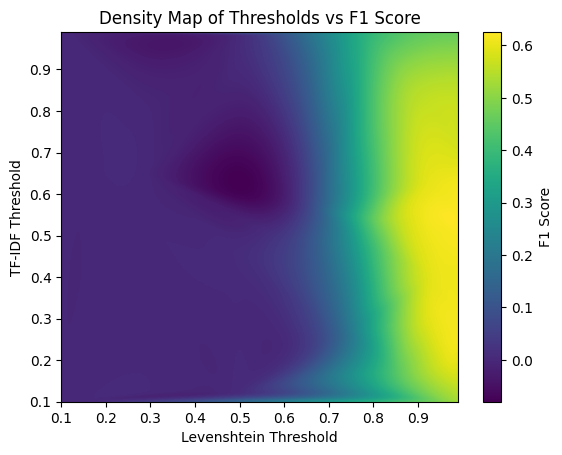

In [39]:
levenshtein_list = [d['levenshtein_thresh'] for d in opt_df['params']]
tf_idf_list = [d['tf_idf_thresh'] for d in opt_df['params']]
target_list = list(opt_df['target'])

# create a grid to interpolate over
grid_x, grid_y = np.mgrid[min(levenshtein_list):max(levenshtein_list):1000j, min(tf_idf_list):max(tf_idf_list):1000j]

# interpolate with griddata
grid_z = griddata((levenshtein_list, tf_idf_list), target_list, (grid_x, grid_y), method='cubic')

# plot the interpolated data as a density map
plt.imshow(grid_z.T, extent=(min(levenshtein_list), max(levenshtein_list), min(tf_idf_list), max(tf_idf_list)), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='F1 Score')
plt.xlabel('Levenshtein Threshold')
plt.ylabel('TF-IDF Threshold')
plt.title('Density Map of Thresholds vs F1 Score')
plt.show()

In [41]:
# get best parameters from optimization
print(opt_df.loc[opt_df['target'].idxmax(), 'target'])
print(opt_df.loc[opt_df['target'].idxmax(), 'params'])

0.62474644546721
{'levenshtein_thresh': 0.9671259708871721, 'tf_idf_thresh': 0.536796092264767}


In [42]:
# test best parameters
tf_idf_thresh = 0.53680
levenshtein_thresh = 0.96713

f1 = optimize_labeler(tf_idf_thresh, levenshtein_thresh)
print('f1:', f1)

logging symptom expressions from base lexicon...
logging symptom expressions from annotation files...
expression preprocessing complete...
f1: 0.6247464454672104
